# MINST图像分类-识别
## 导入包

In [10]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


<PIL.Image.Image image mode=L size=28x28 at 0x20CB9D80650>
28 28 <class 'int'>
                                                        
                                                        
                                                        
                                                        
                                                        
                        # # #                           
                        # # # # # # # # #               
                        #                 #             
                        #                               
                        #                               
                        #                               
                      # #                               
                      # # # # # #                       
                      # # # # # # #                     
                    # # #         # #                   
                  # # #           # #                   
         

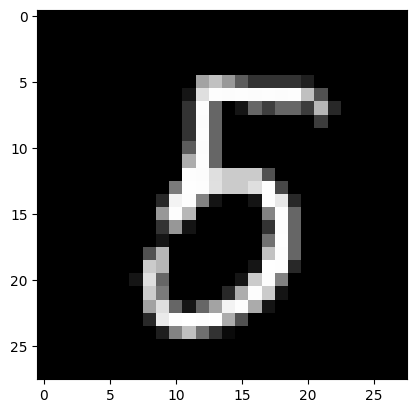

In [11]:


image_path = "./images/mnistData/mnist_test/5/45.png"
image = Image.open(image_path).convert('L')
print(image)
height,width = image.size
print(height,width,type(height))


for h in range(height):
    for w in range(width):
        if(image.getpixel((w,h))>127):
            print("#",end=' ')
        else:
            print(" ",end=' ')
    print(end='\n')

transform = torchvision.transforms.Compose([torchvision.transforms.Resize((28, 28)),torchvision.transforms.ToTensor()])

image = transform(image)
print(image.shape)


to_pil_image = transforms.ToPILImage()
pil_image = to_pil_image(image)
plt.imshow(pil_image,cmap="gray")
plt.show()

In [12]:
from MINST_Model import *

In [13]:
classes = ['0','1','2','3','4','5','6','7','8','9']

model = torch.load("models/test_1/MINST_99.pth", map_location=torch.device('cpu'))
print(model)
image = torch.reshape(image, (1, 1, 28, 28))
model.eval()
with torch.no_grad():
    output = model(image)
print(output)
# 显示结果
print(classes[output.argmax(1)])

Net(
  (model): Sequential(
    (0): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=128, out_features=8, bias=True)
    (6): Linear(in_features=8, out_features=10, bias=True)
  )
)
tensor([[  2.7208, -15.7538,  -1.5568,   9.0834, -11.5650,  17.8693,   6.7555,
          -4.0134,  10.3992,   4.2283]])
5
